In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import time

In [8]:
def createAlignedState(N):
    """
    Returns a state in which every spin is pointing up as an N by N numpy array
    """
    return np.ones([1,N])

#def createJArray(state):
#    J = np.random.uniform(size = [state.size, state.size])
#    J += J.T
#    return J
#
#def indexToCoord(index, state):
#    return np.unravel_index(index, state.shape)
#
#def coordToIndex(spin, state):
#    return np.ravel_multi_index(spin, state.shape)
#
def createRandState(N):
    """
    Returns a state in which every spin is randomized as an N by N numpy array
    """
    return np.random.choice([-1, 1], size = [1,N])

def calcTotalEnergy(state, J, mu, B):
    """
    Calculates the total energy in the presence of an external field B with the equation
    E = -J (Sum_neighbors s_i*s_j) - mu * B * (Sum s_i)
    
    args:
        state: a 2d numpy array of +1 or -1
        J: The self coupling term                    array type
        mu: The magnetic moment                      float
        B: The external, applied field               float
    returns:
        Energy: The energy of the state
    """
    (xSize, ySize) = state.shape
    JSize = state.size
    Energy = 0
    for x in range(xSize):
        for y in range(ySize):
            #print(x)
            #print(y)
            # Compute the interaction term with the 2 neighbors that are +1 in each direction
            Energy += -J * state[x,y] * state[(x+1) % xSize, y]
            Energy += -J * state[x,y] * state[(x-1) % xSize, y]
            #print(indexToCoord(coordToIndex(((x+1) % xSize,y), state) % JSize, J))
            #Energy += -J[indexToCoord((coordToIndex((x,(y + 1) % ySize), state) + ySize), J)] * state[x,y] * state[x,(y+1) % ySize]  
            # Compute the interaction term with the field
            Energy += -mu*B*state[x,y]
            #print(Energy)
    return Energy

def pickRandSite(state):
    """
    Returns a randomly chosen site within the state
    """
    (xSize, ySize) = state.shape
    return (np.random.randint(xSize), np.random.randint(ySize))

def calcDeltaE(state, site, J, mu, B):
    """
    Returns the change in energy due to flipping the spin at the given site
    
    args:
        state: a 2d numpy array of +1 or -1
        site: the chosen site
    returns:
        deltaE: The change in energy
    """    
    (xSize, ySize) = state.shape
    JSize = state.size
    #print((site[0]+1, site[1]-1))
    deltaEField = 2 * mu * B * state[site] 
    deltaENeighbors = 2 * J * state[site]*(
              state[(site[0]-1) % xSize, site[1]] 
            + state[(site[0]+1) % xSize, site[1]] 
            #+ state[site[0], (site[1]-1) % ySize] 
            #+ state[site[0], (site[1]+1) % ySize] 
        )
    return deltaENeighbors + deltaEField
   
def ising1D(state, T, nFrames, J, mu=1, B=.1):
    """
    Runs the ising simulation for a specified number of frames, where a
    frame is the number of steps needed to interrogate every site once, on
    average.  Thus a frame is state.size steps
    
    args:
        state: a 2d numpy array of +1 or -1
        T: The temperature, given in energy units
        nFrames: The number of frames to run for
        B: The strength of the B-field
    """    
    nSteps = nFrames*state.size
    # Keep track of the total energy and magnetization of the system
    E = [calcTotalEnergy(state, J, mu, B)]
    M = [np.sum(state)]
       
    for t in range(1,nSteps):
        proposedSite = pickRandSite(state)
        deltaE = calcDeltaE(state, proposedSite, J, mu, B)
        # print(proposedSite, deltaE)
        #Accept the state if it lowers the energy or with probability e^(-deltaE/T)
        if ( deltaE <= 0 ) or ( np.random.rand() < np.exp(-deltaE/T) ):
            state[proposedSite] *= -1;
            E.append(E[-1] + deltaE)
            M.append(M[-1] + 2*state[proposedSite])
        else:
            E.append(E[-1])
            M.append(M[-1])
    #plt.imshow(J)
    #plt.show()
    return state, np.array(E), np.array(M)

Temperature 1.0 took 1.3593909740447998 seconds to run 1000 frames
Temperature 1.1 took 1.2406837940216064 seconds to run 1000 frames
Temperature 1.2000000000000002 took 1.299518346786499 seconds to run 1000 frames
Temperature 1.3000000000000003 took 1.3164525032043457 seconds to run 1000 frames
Temperature 1.4000000000000004 took 1.3773481845855713 seconds to run 1000 frames
Temperature 1.5000000000000004 took 1.379300832748413 seconds to run 1000 frames
Temperature 1.6000000000000005 took 1.6106879711151123 seconds to run 1000 frames
Temperature 1.7000000000000006 took 1.4261400699615479 seconds to run 1000 frames
Temperature 1.8000000000000007 took 1.3593933582305908 seconds to run 1000 frames
Temperature 1.9000000000000008 took 1.3852958679199219 seconds to run 1000 frames
Temperature 2.000000000000001 took 1.3144762516021729 seconds to run 1000 frames
Temperature 2.100000000000001 took 1.4002132415771484 seconds to run 1000 frames
Temperature 2.200000000000001 took 1.6286435127258

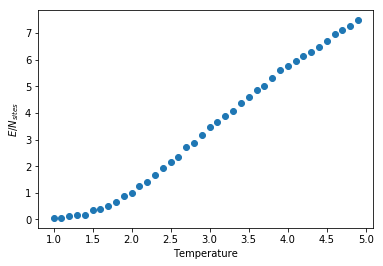

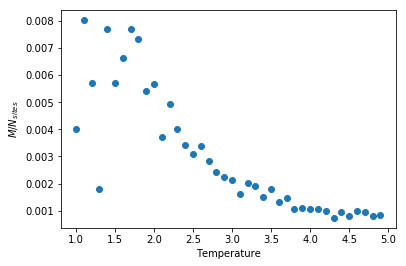

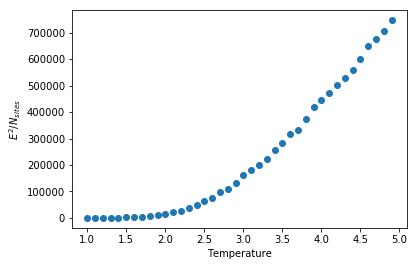

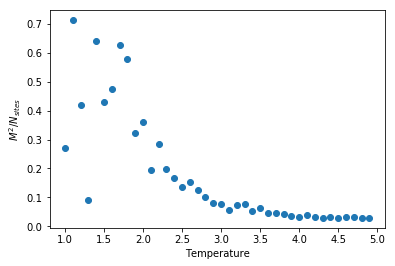

In [14]:
nFrames=1000
temperature = np.arange(1, 5, .1)
meanE=[]
meanM=[]
meanESq=[]
meanMSq=[]
for T in temperature:
    start = time.time()
    nSide = 100
    state = createRandState(nSide)
    finalState, ETemp, MTemp = ising1D(state, T, nFrames, 1)
    meanE.append(np.mean(ETemp))
    meanM.append(np.mean(MTemp))
    meanESq.append(np.mean(ETemp**2))
    meanMSq.append(np.mean(MTemp**2))
    end = time.time()
    print(f'Temperature {T} took {end-start} seconds to run {nFrames} frames')

plt.figure(0)
plt.plot(temperature, np.array(meanE)/(nSide),'o')
plt.xlabel('Temperature')
plt.ylabel('$E/N_{sites}$')

plt.figure(1)
plt.plot(temperature, np.array(meanM)/(nSide),'o')
plt.xlabel('Temperature')
plt.ylabel('$M/N_{sites}$')

plt.figure(2)
plt.plot(temperature, np.array(meanESq)/(nSide),'o')
plt.xlabel('Temperature')
plt.ylabel('$E^2/N_{sites}$')

plt.figure(3)
plt.plot(temperature, np.array(meanMSq)/(nSide),'o')
plt.xlabel('Temperature')
plt.ylabel('$M^2/N_{sites}$')